# OPENCV TUTORIALS 

In [1]:
import cv2
import numpy as np
import random

In [10]:
img1=cv2.imread('three.png',0)#loads the image in BGR format instead of RGB format
img2=cv2.imread('four.png',0)
#cv2.IMREAD_COLOR(-1)
#cv2.IMREAD_GRAYSCALE(0)
#cv2.IMREAD_UNCHANGED(1) : including alpha channel
cv2.imshow('three',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img1=cv2.resize(img1,(28,28))   #we are just changing the dimensions of pixels
img1=img1.astype('float32')/255
img2=cv2.resize(img2,(28,28))   #we are just changing the dimensions of pixels
img2=img2.astype('float32')/255
# img=cv2.resize(img,(0,0),fx=2,fy=2)

In [14]:
img=[img1,img2]
img=np.array(img)

In [15]:
img=img.reshape((-1,28,28,1))

In [105]:
img=cv2.rotate(img,cv2.ROTATE_180)

In [106]:
cv2.imwrite('new_TLOU2.jpg',img)

True

In [107]:
img_center=(np.array(img.shape[1::-1])/2)
matrix=cv2.getRotationMatrix2D(img_center,30,1)#Angle,scale
rotated_img=cv2.warpAffine(img,matrix,img.shape[1::-1])

In [5]:
cv2.imshow('three',img)
# cv2.imshow('TLOU2',rotated_img)
cv2.waitKey(0)#waits for an infinite no. of milliseconds until we press a key 
cv2.destroyAllWindows()

In [9]:
print(img) #no. of entries in each column is equal to the no. of channels
# 4th channel specifies the opaque level of the pixel

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6  63 156 159 195 177 177 130  63  60
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4 101 220 225 254 254 254 254 254 254 254 254 253
  130   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  29 254 254 254 188 163 163 163 109 109 191 254 254
  254  95   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  12 171 240  32   2   0   0   0   0   0   2   4 203
  254 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  29   0   0   0   0   0   0   0   

In [8]:
pip install tensorflow

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518835 sha256=68a8749a20421cb5cf909c922478eb1bf9561b76944da996c19fdb89a28c8a7d
  Stored in directory: c:\users\nimish\appdata\local\pip\cache\wheels\ac\c9\8c\f4c803770fde18dcdd82e84675eb6add1c0d1035f7214a96fa
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


In [2]:
import tensorflow as tf

In [7]:
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape input data to match LeNet-5 architecture
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the LeNet-5 model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
# print(f"Test Loss: {test_loss:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

test_loss1, test_accuracy1 = model.evaluate(img, np.array([0,0,0,0,1,0,0,0,0,0]), verbose=0)
print(f"Test Accuracy: {test_accuracy1:.4f}")

Epoch 1/10
469/469 [==============================] - 13s 23ms/step - loss: 0.3076 - accuracy: 0.9087 - val_loss: 0.1070 - val_accuracy: 0.9663
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0951 - accuracy: 0.9703 - val_loss: 0.0637 - val_accuracy: 0.9793
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0559 - val_accuracy: 0.9810
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.0432 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 11s 22ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0387 - val_accuracy: 0.9868
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0423 - val_accuracy: 0.9858
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0477 - val_accuracy:

ValueError: Data cardinality is ambiguous:
  x sizes: 28
  y sizes: 10
Make sure all arrays contain the same number of samples.

In [16]:
test_loss1, test_accuracy1 = model.evaluate(img, np.array([[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0]]), verbose=0)
print(f"Test Accuracy: {test_accuracy1:.4f}")

Test Accuracy: 0.5000


In [110]:
print(type(img))

<class 'numpy.ndarray'>


In [111]:
print(img.shape)#(no. of rows,no. of columns,no. of channels)
# BGR format in opencv

(800, 800, 4)


In [112]:
print(img[0,4])

[ 45  45  45 255]


In [113]:
for i in range(100):
    for j in range(img.shape[1]):
        img[i][j]=[random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)]
        
cv2.imshow('TLOU2',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
ear=img[100:200,50:200]
img[300:400,400:550]=ear#needs to be of same shape while copying and pasting

cv2.imshow('TLOU2',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
cap=cv2.VideoCapture(0)#0 is for no. of web cam devices
while True:
    ret,frame=cap.read()#ret contains the return value from camera frame either True or False
    
    width=int(cap.get(3))#cap.get() gives float
    height=int(cap.get(4))
    
    image=np.zeros(frame.shape,dtype=np.uint8)
    smaller_frame=cv2.resize(frame,(0,0),fx=0.5,fy=0.5)
    image[:height//2,:width//2]=cv2.rotate(smaller_frame,cv2.ROTATE_180)
    image[height//2:,:width//2]=cv2.rotate(smaller_frame,cv2.ROTATE_180)
    image[:height//2,width//2:]=smaller_frame
    image[height//2:,width//2:]=smaller_frame
    
    cv2.imshow('frame',image)
    
    if cv2.waitKey(1)==ord('q'):#ord value of q or ASCII value of q
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap=cv2.VideoCapture(0)#0 is for no. of web cam devices
while True:
    ret,frame=cap.read()#ret contains the return value from camera frame either True or False
    
    width=int(cap.get(3))#cap.get() gives float
    height=int(cap.get(4))
    
    image=np.random.randint(0,255,frame.shape,dtype=np.uint8)
    smaller_frame=cv2.resize(frame,(0,0),fx=0.5,fy=0.5)
    smaller_frame_center=(np.array(smaller_frame.shape[1::-1])/2)
    matrix=cv2.getRotationMatrix2D(smaller_frame_center,30,1)
    image[height//4:3*height//4,width//4:3*width//4]=cv2.warpAffine(smaller_frame,matrix,smaller_frame.shape[1::-1])
    
    cv2.imshow('frame',image)
    
    if cv2.waitKey(1)==ord('q'):#ord value of q or ASCII value of q
        break
cap.release()
cv2.destroyAllWindows()

In [37]:
import datetime
cap=cv2.VideoCapture(0)#0 is for no. of web cam devices
while True:
    ret,frame=cap.read()#ret contains the return value from camera frame either True or False
    
    width=int(cap.get(3))#cap.get() gives float
    height=int(cap.get(4))
    
    img=cv2.line(frame,(0,0),(width,height),(0,255,0),10)
    img=cv2.line(img,(0,height),(width,0),(0,0,255),5)
    img=cv2.rectangle(img,(100,100),(200,200),(128,128,128),-1)#-1 to completely fill the rectangle
    img=cv2.circle(img,(300,400),55,(0,0,255),-1)
    img=cv2.arrowedLine(img,(0,0),(width,height),(255,0,0),5)
    img=cv2.ellipse(img,(width//2,height//2),(100,50),0,0,360,(0,0,255),5)
    #cv2.circle(source image,center,radius,color,thickness)
    #cv2.line(source image,start position,end position,color,thickness)
    font=cv2.FONT_ITALIC
    #img=cv2.putText(img,'Nimish',(200,height-10),font,1,(0,0,0),5,cv2.LINE_AA)
    #cv2.putText(source image,text,position,font,font scale,color,thickness,linetype)
    datet=str(datetime.datetime.now())
    img=cv2.putText(img,datet,(200,height-10),font,1,(0,0,0),5,cv2.LINE_AA)
    cv2.imshow('frame',img )
    
    if cv2.waitKey(1)==ord('q'):#ord value of q or ASCII value of q
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)#0 is for no. of web cam devices
while True:
    ret,frame=cap.read()#ret contains the return value from camera frame either True or False
    
    width=int(cap.get(3))#cap.get() gives float
    height=int(cap.get(4))
    
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_blue=np.array([90,50,50])
    upper_blue=np.array([130,255,255])
    
    mask=cv2.inRange(hsv,lower_blue,upper_blue)#0 or 1
    
    result=cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('frame',result)
    cv2.imshow('mask',mask)
    
    if cv2.waitKey(1)==ord('q'):#ord value of q or ASCII value of q
        break
cap.release()
cv2.destroyAllWindows()
#HSV: hue,saturation and lightness/brightness

In [ ]:
BGR_color=np.array([[[255,0,0]]])
print(cv2.cvtColor(BGR_color,cv2.COLOR_BGR2HSV))

In [ ]:
cap=cv2.VideoCapture(0)#0 is for no. of web cam devices
while True:
    ret,frame=cap.read()#ret contains the return value from camera frame either True or False
    
    width=int(cap.get(CAP_PROP_FRAME_WIDTH))#cap.get() gives float
    height=int(cap.get(CAP_PROP_FRAME_HEIGHT))
    
    #hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_blue=np.array([90,50,50])
    upper_blue=np.array([130,255,255])
    
    mask=cv2.inRange(frame,lower_blue,upper_blue)
    
    result=cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('frame',result)
    
    if cv2.waitKey(1)==ord('q'):#ord value of q or ASCII value of q
        break
cap.release()
cv2.destroyAllWindows()
#HSV: hue,saturation and lightness/brightness

In [81]:
import numpy as np
import cv2
#corner detection algorithms works with greyscale images
img=cv2.imread('Assets/Chessboard.png',-1)
img=cv2.resize(img,(0,0),fx=0.75,fy=0.75)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners=cv2.goodFeaturesToTrack(gray,100,0.05,10)
#cv2.goodFeaturesToTrack(source image,no. of best corners,corner quality level,min. distance)

corners=np.int0(corners)

for corner in corners:
    x,y=corner.ravel()#flattens an array [[1,2],[2,1]]->[1,2,2,1]
    cv2.circle(img,(x,y),5,(255,0,0),-1)
    
for i in range(len(corners)):
    for j in range(i+1,len(corners)):
        corner1=tuple(corners[i][0])
        corner2=tuple(corners[j][0])
        color=tuple(map(lambda x: int(x),np.random.randint(0,255,size=3)))
        cv2.line(img,corner1,corner2,color,1)

cv2.imshow('Chessboard',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
img=cv2.imread('Assets/soccer_practice.jpg',0)
template=cv2.imread('Assets/ball.png',0)
 
h,w=template.shape

methods=[cv2.TM_CCOEFF,cv2.TM_CCOEFF_NORMED,cv2.TM_CCORR,cv2.TM_CCORR_NORMED,cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]
#used on grayscale image
for method in methods:
    img2=img.copy()
    
    result=cv2.matchTemplate(img2,template,method)#performs a kind of convolution
    #dimensions will be (W-w+1,H-h+1)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        location=min_loc
    else:
        location=max_loc
        
    bottom_right=(location[0]+w,location[1]+h)
    cv2.rectangle(img2,location,bottom_right,255,5)
    
    cv2.imshow('Template match',img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
img=cv2.imread('Assets/soccer_practice.jpg',0)
template1=cv2.imread('Assets/shoe.png',0)
template2=cv2.imread('Assets/ball.png',0)
template1=cv2.resize(template,(0,0),fx=0.75,fy=0.75)
template2=cv2.resize(template,(0,0),fx=0.75,fy=0.75)
h1,w1=template1.shape
h2,w2=template2.shape

methods=[cv2.TM_CCOEFF,cv2.TM_CCOEFF_NORMED,cv2.TM_CCORR,cv2.TM_CCORR_NORMED,cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]
#used on grayscale image
for method in methods:
    img2=img.copy()
    img2=cv2.resize(img2,(0,0),fx=0.75,fy=0.75)
    result1=cv2.matchTemplate(img2,template1,method)#performs a kind of convolution
    result2=cv2.matchTemplate(img2,template2,method)
    #dimensions will be (W-w+1,H-h+1)
    min_val1,max_val1,min_loc1,max_loc1=cv2.minMaxLoc(result1)
    min_val2,max_val2,min_loc2,max_loc2=cv2.minMaxLoc(result2)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        location1,location2=min_loc1,min_loc2
    else:
        location1,location2=max_loc1,max_loc2
        
    bottom_right1=(location1[0]+w1,location1[1]+h1)
    bottom_right2=(location2[0]+w2,location2[1]+h2)
    cv2.rectangle(img2,location1,bottom_right1,255,5)
    cv2.rectangle(img2,location2,bottom_right2,255,5)
    
    cv2.imshow('Template match',img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Face and eye detection 
# HAAR Cascade explanation

In [74]:
import numpy as np
import cv2

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")#path of the classifier
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye_tree_eyeglasses.xml")

while (cap.isOpened()):#returns true or false
    ret,frame=cap.read()
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
#faces=face_cascade.detectMultiScale(gray,scale factor,min neighbours,min size,max size)
 
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),5)
        
        roi_gray=gray[y:y+w,x:x+w]#area from grayscale image
        roi_color=frame[y:y+h,x:x+w]#area from colored image
        eyes=eye_cascade.detectMultiScale(roi_gray,1.3,5)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
    
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1)==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [4]:
cap=cv2.VideoCapture(0)#0 is for no. of web cam devices
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter('output.avi',fourcc,20.0(fps),frame.size)
#fourcc=cv2.VideoWriter_fourcc('X'+'V'+'I'+'D')

while True:
    ret,frame=cap.read()#ret contains the return value from camera frame either True or False
    
    if ret==True:
        
        width=int(cap.get(3))#cap.get() gives float
        height=int(cap.get(4))
        
        out.write(frame)
    
        cv2.imshow('frame',image)
    
        if cv2.waitKey(1)==ord('q'):#ord value of q or ASCII value of q
            break
cap.release()
out.release()
cv2.destroyAllWindows()

<>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
C:\Users\Nimish\AppData\Local\Temp/ipykernel_20000/3107379063.py:3: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  out=cv2.VideoWriter('output.avi',fourcc,20.0(fps),frame.size)


NameError: name 'fps' is not defined

In [18]:
import cv2
import numpy as np
import random

image=np.zeros((500,500),dtype=np.uint8)
image=cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)

def Drawing_Random_Lines(img,Number):
    for i in range(Number):
        pt1=(random.randint(1,500),random.randint(1,500))
        pt2=(random.randint(1,500),random.randint(1,500))
        colors=tuple(map(lambda x: int(x),np.random.randint(0,255,size=3)))
        cv2.line(img,pt1,pt2,colors,1)

def Drawing_Random_Circles(img,Number):
    for i in range(Number):
        center=(random.randint(0,500),random.randint(0,500))
        radius=random.randint(10,80)
        colors=tuple(map(lambda x: int(x),np.random.randint(0,255,size=3)))
        if radius>50:
            cv2.circle(img,center,radius,colors,2)
        else:
            cv2.circle(img,center,radius,colors,-1)

#Drawing_Random_Lines(image,500)
Drawing_Random_Circles(image,200)

cv2.imshow('Random circles',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
import cv2
cap=cv2.VideoCapture(0)
width=int(cap.get(3))#cv2.CAP_PROP_FRAME_WIDTH
height=int(cap.get(4))#cv2.CAP_PROP_FRAME_HEIGHT

print(width)
print(height)

cap.set(cv2.CAP_PROP_FRAME_WIDTH,1280)#setting width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,720)#setting height
#onlu changes if its available otherwise camera resolution sets to default value
print(int(cap.get(3)))
print(int(cap.get(4)))

while True:
    ret,frame=cap.read()
        
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',frame)
        
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

640
480
1280
720


# Image Blurring

1)Edges
2)Brightness or contrast
3)Color

Filter used for blurring is known as low pass filter

In [2]:
#high pass filter is used in detecting edges in the image 
import cv2
import numpy as np

img=cv2.imread('Assets/TLOU2.png',-1)
cv2.imshow('TLOU2',img)
cv2.waitKey(0)

kernel=np.ones((5,5),dtype=np.float32)/25 #to normalize it

blurred_image=cv2.filter2D(img,-1,kernel) #convolution operation
cv2.imshow('TLOU2_blurred',blurred_image)
cv2.waitKey(0)

kernel=np.ones((9,9),dtype=np.float32)/25 #to normalize it

blurred_image1=cv2.filter2D(img,-1,kernel) #convolution operation
cv2.imshow('TLOU2_blurred1',blurred_image1)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

img=cv2.imread('Assets/TLOU2.png',-1)
cv2.imshow('TLOU2',img)
cv2.waitKey(0)

gaussian_blur=cv2.GaussianBlur(img,(7,7),0) #0 means standard deviation is calculated using kernel size
cv2.imshow('TLOU2_gaussian_blurred',gaussian_blur)
cv2.waitKey(0)

avg_blur=cv2.blur(img,(3,3)) #convolution operation
cv2.imshow('TLOU2_average_blurred',avg_blur)
cv2.waitKey(0)

median_blur=cv2.medianBlur(img,5) #square filter with odd dimensions is used
#salt and pepper noise(white and black noise)
cv2.imshow('TLOU2_median_blurred',median_blur)
cv2.waitKey(0)

bilateral_blur=cv2.bilateralFilter(img,5,10,2) #diameter of the pixel neighbourhood
#color space, coordinate space
cv2.imshow('TLOU2_bilateral_blurred',bilateral_blur) #it preserves the edges
cv2.waitKey(0)


cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\bilateral_filter.dispatch.cpp:166: error: (-215:Assertion failed) (src.type() == CV_8UC1 || src.type() == CV_8UC3) && src.data != dst.data in function 'cv::bilateralFilter_8u'


In [9]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    cv2.imshow('frame',frame)
    
    blurred_frame=cv2.medianBlur(frame,1)
    cv2.imshow('blurred_frame',blurred_frame)
    
    if cv2.waitKey(1)==ord('r'):
        break

cap.release()
cv2.destroyAllWindows()

# MORPHOLOGICAL OPERATIONS

Erosion>>Dilation=opening,
Dilation>>Erosion=closing

In [36]:
#performed on binary images
import cv2
import numpy as np
img=cv2.imread('Assets/Alphabets.png',-1)

cv2.imshow('Alphabets',img)
cv2.waitKey(0)

kernel=np.ones((9,9),dtype=np.uint8)

eroded_img=cv2.erode(img,kernel,iterations=2)
dilated_img=cv2.dilate(img,kernel)

cv2.imshow('Eroded_image',eroded_img)
cv2.imshow('Dilated_image',dilated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Opening
# Closing
# Morphological Gradient
# Top Hat
# Black Hat

In [10]:
import cv2
import numpy as np
img=cv2.imread('Assets/Alphabets.png',-1)

cv2.imshow('Alphabets',img)
cv2.waitKey(0)

kernel=np.ones((9,9),dtype=np.uint8)

# eroded_img=cv2.erode(img,kernel)
# dilated_img=cv2.dilate(img,kernel)

# cv2.imshow('Eroded_image',eroded_img)
# cv2.imshow('Dilated_image',dilated_img)

new_image=cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel) #6
# new_image=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel) 4
# new_image=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel) 3
# new_image=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel) 2
# new_image=cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel) 5
cv2.imshow('new image',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Hit,Miss and Fit

 detects a given pattern in a binary image
 ,used to thin and skeletonize a shape in a binary image

In [17]:
import cv2 as cv
import numpy as np
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)
rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)
kernel = cv.resize(kernel, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("kernel", kernel)
cv.moveWindow("kernel", 0, 0) #used to display window at specific coordinates
input_image = cv.resize(input_image, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Original", input_image)
cv.moveWindow("Original", 0, 200)
output_image = cv.resize(output_image, None , fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Hit or Miss", output_image)
cv.moveWindow("Hit or Miss", 500, 200)

cv.waitKey(0)
cv.destroyAllWindows()

In [62]:
import cv2
import numpy as np

# def show_wait_destroy(winname,image):
#     cv2.imshow(winname,image)
#     cv2.moveWindow(winname,500,0)
#     cv2.waitKey(0)
#     cv2.destroyWindow(winname)
    
img=cv2.imread('Assets/music_notes.png',-1)
img=cv2.resize(img,(800,200))
cv2.imshow('music notes',img)
cv2.waitKey(0)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('gray',gray)
cv2.waitKey(0)

gray=cv2.bitwise_not(gray)
binary=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2) #used to convert an image to binary by adaptive thresholding
cv2.imshow('binary',binary)
cv2.waitKey(0)

horizontal=np.copy(binary)
vertical=np.copy(binary)

horizontalstructure=cv2.getStructuringElement(cv2.MORPH_RECT,(1,30))
horizontal=cv2.erode(horizontal,horizontalstructure)
horizontal=cv2.dilate(horizontal,horizontalstructure)
cv2.imshow('horizontal',horizontal)
cv2.waitKey(0)

verticalstructure=cv2.getStructuringElement(cv2.MORPH_RECT,(15,1))
vertical=cv2.erode(vertical,verticalstructure)
vertical=cv2.dilate(vertical,verticalstructure)
cv2.imshow('vertical',vertical)
cv2.waitKey(0)

vertical=cv2.bitwise_not(vertical)

edges=cv2.adaptiveThreshold(vertical,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
kernel=np.ones((2,2),dtype=np.uint8)
edges=cv2.dilate(edges,kernel)
smooth=np.copy(vertical)
smooth=cv2.blur(smooth,(2,2))
(rows,columns)=np.where(edges!=0)
vertical[rows,columns]=smooth[rows,columns]

cv2.imshow('final img',vertical)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [37]:
import cv2
import numpy as np

events=[i for i in dir(cv2) if 'EVENT' in i] # all functions and methods inside cv2 package
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [47]:
def click_event(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        print(x,',',y)
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,str(x)+','+str(y),(x,y),font,1,(255,255,0),2)
        cv2.imshow('image',img)
    if event==cv2.EVENT_RBUTTONDOWN:
        blue=img[y,x,0]
        green=img[y,x,1]
        red=img[y,x,2]
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,str(blue)+','+str(green)+','+str(red),(x,y),font,1,(0,255,255),2)
        cv2.imshow('image',img)
        
img=np.zeros((512,512,3),dtype=np.uint8)
cv2.imshow('image',img)

cv2.setMouseCallback('image',click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

216 , 241


In [52]:
def click_event(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),3,(0,0,255),-1)
        points.append((x,y))
        if len(points)>=2:
            for point in points:
                cv2.line(img,points[-1],point,(255,255,0),1)
        cv2.imshow('image',img)
        
img=np.zeros((512,512,3),dtype=np.uint8)
cv2.imshow('image',img)

points=[]

cv2.setMouseCallback('image',click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#img.size - returns the total no. of pixels inside the image
#b,g,r=cv2.split(img)
#img=cv2.merge((b,g,r))
#To add 2 images they must be of the same size

In [61]:
img1=cv2.imread('Assets/ball.png',-1)
img2=cv2.imread('Assets/shoe.png',-1)

img1=cv2.resize(img1,(512,512))
img2=cv2.resize(img2,(512,512))

dst=cv2.addWeighted(img1,0.5,img2,0.5,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
import cv2
import numpy as np
#bitwise operations are useful when working with masks(masks are binary images that indicates the pixels on which operation is to be performed)
img1=np.zeros((250,500,3),dtype=np.uint8)
img1=cv2.rectangle(img1,(200,0),(300,100),(255,255,255),-1)

bitand=cv2.bitwise_and(img1,img1)

cv2.imshow('image',img1)
cv2.imshow('bitand',bitand)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Trackbar

In [3]:
import numpy as np
import cv2

def nothing(x):# x is the current position of trackbar
    print(x)

img=np.zeros((300,512,3),dtype=np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('B','image',0,255,nothing)
# cv2.createTrackbar(trackbar name,window name,start pos. of trackbar,end pos.,call back function)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('R','image',0,255,nothing)

switch='0:OFF\n 1:ON'
cv2.createTrackbar(switch,'image',0,1,nothing)

while True:
    cv2.imshow('image',img)
    if cv2.waitKey(1)==ord('q'):
        break
        
    b=cv2.getTrackbarPos('B','image')
    g=cv2.getTrackbarPos('G','image')
    r=cv2.getTrackbarPos('R','image')
    s=cv2.getTrackbarPos(switch,'image')
    
    if s==0:
        img[:]=0
    else:
        img[:]=[b,g,r]
    
cv2.destroyAllWindows()

1
0
4
17
29
42
55
59
66
73
78
80
83
84
85
86
88
89
91
92
93
94
95
101
112
119
140
158
170
175
180
187
190
194
195
198
200
202
204
1
4
12
22
31
48
63
79
86
91
96
101
103
106
108
112
114
117
118
119
121
0
1


In [2]:
import numpy as np
import cv2

def nothing(x):# x is the current position of trackbar
    print(x)

cv2.namedWindow('image')

cv2.createTrackbar('cp','image',10,400,nothing)
# cv2.createTrackbar(trackbar name,window name,start pos. of trackbar,end pos.,call back function)

switch='color/grayscale'
cv2.createTrackbar(switch,'image',0,1,nothing)

while True:
    img=cv2.imread('Assets/TLOU2.png',-1)
    pos=cv2.getTrackbarPos('cp','image')
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,str(pos),(50,150),font,4,(0,0,255),)
    if cv2.waitKey(1)==ord('q'):
        break
        
    s=cv2.getTrackbarPos(switch,'image')
    
    if s==0:
        pass
    else:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    img=cv2.imshow('image',img)
    
cv2.destroyAllWindows()

10
20
21
34
35
41
44
45
46
47
48
49
51
53
54
55
57
61
62
65
66
69
72
77
80
84
86
91
97
100
106
110
116
120
123
124
128
131
133
135
136
140
143
146
1
0
139
128
115
82
59
18
0
2
3
7
9
11
12
13
14
15
16
17
18
19
20
19
18
17
16
13
12
7
3
2
1
0
1
2
3
5
7
9
10
11
12
13
16
18
20
21
23
25
30
34
40
48
59
66
74
85
101
115
125
128
140
144
154
167
174
177
180
184
189
190
194
195
200
205
206
210
211
216
221
222
225
226
230
231
234
236
237
240
242
243
246
247
251
253
256
259
262
266
268
269
270
272
275
276
277
280
282
283
286
289
292
295
298
301
303
307
309
311
315
318
321
323
326
328
329
332
335
338
341
342
344
348
351
354
355
357
360
363
364
367
370
374
378
379
384
388
389
390
391
393
396
397
400


In [5]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow('Tracking')
cap=cv2.VideoCapture(0)

cv2.createTrackbar('LH','Tracking',0,255,nothing)
cv2.createTrackbar('LS','Tracking',0,255,nothing)
cv2.createTrackbar('LV','Tracking',0,255,nothing)
cv2.createTrackbar('UH','Tracking',255,255,nothing)
cv2.createTrackbar('US','Tracking',255,255,nothing)
cv2.createTrackbar('UV','Tracking',255,255,nothing)

while True:
    ret,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    l_h=cv2.getTrackbarPos('LH','Tracking')
    l_s=cv2.getTrackbarPos('LS','Tracking')
    l_v=cv2.getTrackbarPos('LV','Tracking')
    
    u_h=cv2.getTrackbarPos('UH','Tracking')
    u_s=cv2.getTrackbarPos('UH','Tracking')
    u_v=cv2.getTrackbarPos('UH','Tracking')
    
    l_b=np.array([l_h,l_s,l_v])
    u_b=np.array([u_h,u_s,u_v])
    
    mask=cv2.inRange(hsv,l_b,u_b)
    
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('frame',res)
    cv2.imshow('mask',mask)
    
    if cv2.waitKey(1)==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Simple image thresholding

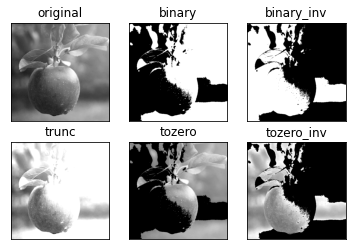

In [35]:
#Thresholding is a segmentation technique used for separating an object from its background 
#variation of intensity between object and background pixels
#we compare the pixel intensity values with a threshold
#2 groups-- 1 having intensity values greater and 1 having intensity values less than the threshold value
import cv2
import numpy as np

img=cv2.imread('Assets/apple.png',0)
#threshold binary
ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# ret,th1=cv2.threshold(img,threshold value,max. binary value,threshold type)
ret,th2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,th3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,th4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,th5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# cv2.imshow('image',img)
# cv2.imshow('th1',th1)
# cv2.imshow('th2',th2)
# cv2.imshow('th3',th3)
# cv2.imshow('th4',th4)
# cv2.imshow('th5',th5)
titles=['original','binary','binary_inv','trunc','tozero','tozero_inv']
images=[img,th1,th2,th3,th4,th5]

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.show()

In [14]:
import cv2
import numpy as np
window_name='Trackbars'

img=cv2.imread('Assets/apple.png',-1)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.namedWindow(window_name)

def select_threshold(x):
    Threshold_type=cv2.getTrackbarPos('Threshold_type',window_name)
    Threshold_value=cv2.getTrackbarPos('Threshold_value',window_name)
    ret,thresh=cv2.threshold(gray_img,Threshold_value,255,Threshold_type)
    cv2.imshow(window_name,thresh)
    
cv2.createTrackbar('Threshold_value',window_name,0,255,select_threshold)
cv2.createTrackbar('Threshold_type',window_name,0,4,select_threshold)

# cv2.imshow('Apple image',img)
# cv2.imshow('grayscale Apple image',gray_img)
select_threshold(0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)

cv2.namedWindow('video capture')
cv2.namedWindow('Thresholded')

def nothing(x):
    pass

cv2.createTrackbar('l_h','Thresholded',0,180,nothing)
cv2.createTrackbar('l_s','Thresholded',0,255,nothing)
cv2.createTrackbar('l_v','Thresholded',0,255,nothing)
cv2.createTrackbar('u_h','Thresholded',180,180,nothing)
cv2.createTrackbar('u_s','Thresholded',255,255,nothing)
cv2.createTrackbar('u_v','Thresholded',255,255,nothing)

while True:
    ret,frame=cap.read()
    
    frame_hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    l_h=cv2.getTrackbarPos('l_h','Thresholded')
    l_s=cv2.getTrackbarPos('l_s','Thresholded')
    l_v=cv2.getTrackbarPos('l_v','Thresholded')
    u_h=cv2.getTrackbarPos('u_h','Thresholded')
    u_s=cv2.getTrackbarPos('u_s','Thresholded')
    u_v=cv2.getTrackbarPos('u_v','Thresholded')
    
    l_hsv=np.array([l_h,l_s,l_v])
    u_hsv=np.array([u_h,u_s,u_v])
    
    frame_threshold=cv2.inRange(frame_hsv,l_hsv,u_hsv)
    
    cv2.imshow('video capture',frame)
    cv2.imshow('Thresholded',frame_threshold)
    
    if cv2.waitKey(1)==ord('e'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Adaptive Thresholding

In [21]:
#gives different thresholding values for different regions of the same image
#used for images with varying illumination
import cv2
import numpy as np

img=cv2.imread('Assets/apple.png',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,th1=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
th2=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#neighbourhood size,constant c
th3=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

cv2.imshow('th1',th1)
cv2.imshow('th2',th2)
cv2.imshow('th3',th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Matplotlib with opencv

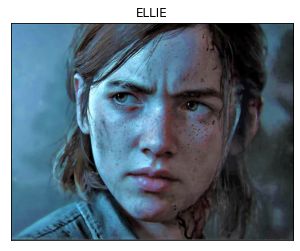

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#2D plotting library
#matplotlib reads the image in RGB format
img=cv2.imread('Assets/TLOU2.png',-1)
cv2.imshow('TLOU2',img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('ELLIE')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

# Image gradients

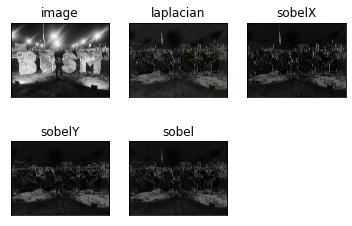

In [46]:
#directional change in the intensity or color in an image
#laplacian method calculates the laplacian derivatives'
#Sobel method combines gaussian and differentiation operators
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('Assets/nimish.jpg',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
lap=cv2.Laplacian(gray,cv2.CV_64F,ksize=3)
#cv2.CV_64F -- Also deals with the negative numbers
lap=np.uint8(np.abs(lap))

sobelX=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)#(src img,dtype,order of derivative-->dx,dy)
sobelY=cv2.Sobel(gray,cv2.CV_64F,0,1)
sobelX=np.uint8(np.abs(sobelX))
sobelY=np.uint8(np.abs(sobelY))

sobel=cv2.addWeighted(sobelX,0.5,sobelY,0.5,0)
# sobel=cv2.bitwise_or(sobelX,sobelY)
titles=['image','laplacian','sobelX','sobelY','sobel']
images=[gray,lap,sobelX,sobelY,sobel]

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
sobel=cv2.resize(sobel,(0,0),fx=0.25,fy=0.25)
cv2.imshow('sobel',sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
import cv2
import numpy as np

img=cv2.imread('Assets/apple.png',-1)
ind=0

while True:
    kernel_size=3+2*(ind%5)
    kernel=np.ones((kernel_size,kernel_size),dtype=np.float32)
    kernel/=(kernel_size*kernel_size)
    
    blur=cv2.filter2D(img,-1,kernel)
    
    cv2.imshow('blur',blur)
    
    if cv2.waitKey(1)==ord('q'):
        break
    ind+=1
    
cv2.destroyAllWindows()

# Adding borders

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
borderType=cv2.BORDER_CONSTANT

img=cv2.imread('Assets/TLOU2.png',-1)
#BORDER_CONSTANT - pads the image with a constant value
#BORDER_REPLICATE - row or column at the edge of original is replicated to the border

top=int(0.05*img.shape[0])
bottom=top
left=int(0.05*img.shape[1])
right=left

while True:
    
    color=[random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    
    result=cv2.copyMakeBorder(img,top,bottom,left,right,borderType,None,color)
    cv2.imshow('result',result)
    
    if cv2.waitKey(1)==27:
        break
    if cv2.waitKey(1)==ord('c'):
        borderType=cv2.BORDER_CONSTANT
    elif cv2.waitKey(1)==ord('r'):
        borderType=cv2.BORDER_REPLICATE

cv2.destroyAllWindows()

# Canny edge detector

In [4]:
# Also known as optimal detector
# low error rate, good localization, minimal response
#1 Noise reduction
#2 Gradient calculation(sobel filter)
#3 Non max suppression
#4 Double threshold
#5 Edge tracking by hysteresis
import cv2
import numpy as np
def nothing(x):
    lt=cv2.getTrackbarPos('LT','Threshold trackbars')
    ut=cv2.getTrackbarPos('UT','Threshold trackbars')
    canny=cv2.Canny(img,lt,ut)
    cv2.imshow('canny',canny)

img=cv2.imread('Assets/TLOU2.png',0)
cv2.namedWindow('Threshold trackbars')
cv2.createTrackbar('LT','Threshold trackbars',0,100,nothing)
cv2.createTrackbar('UT','Threshold trackbars',150,200,nothing)


# titles=['image','canny']
# images=[img,canny]
# for i in range(len(images)):
#      plt.subplot(1,2,i+1)
#      plt.imshow(images[i],'gray')
#      plt.title(titles[i])
#      plt.xticks([])
#      plt.yticks([])
# plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

# Image pyramids

In [43]:
#Type of multiscale signal representation in which a signal or an image is subject to repeated smoothing or subsampling
#Gaussian pyramid(downsample images)
#Laplacian pyramid(upsample images)
# in pyrup method we loose the information if applied to a downsampled image
import cv2
import numpy as np

img=cv2.imread('Assets/TLOU2.png',-1)

# lr=cv2.pyrDown(img)
# ur=cv2.pyrUp(img)
layer=img.copy()
gp=[layer]

for i in range(6):
    layer=cv2.pyrDown(layer)
    gp.append(layer)
#      cv2.imshow(str(i),layer)
    
layer=gp[5]
lp=[layer]

for i in range(5,0,-1):
    gaussian_extended=cv2.pyrUp(gp[i])
    laplacian=cv2.subtract(gp[i-1],gaussian_extended)
    cv2.imshow(str[i],laplacian)

# cv2.imshow('layer',layer)
# cv2.imshow('lr',lr)
# cv2.imshow('ur',ur)
cv2.waitKey(0)
cv2.destroyAllWindows()
#helps to blend the images and reconstruction of the images

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


# Image Blending

In [87]:
#1 load the 2 images of apple and orange 
#2 find the gaussian pyramids for apple and orange 
#3 from gaussian pyramids, find their laplacian pyramids
#4 now join the left half of apple and right half of orange in each levels of laplacian pyramids
#5 finally from this joint image pyramids, reconstruct the original image

import cv2
import numpy as np

apple=cv2.imread('Assets/apple1.png',-1)
apple=cv2.resize(apple,(512,512))
b,g,r,d=cv2.split(apple)
apple=cv2.merge([b,g,r])
orange=cv2.imread('Assets/orange.png')
orange=cv2.resize(orange,(512,512))
print(apple.shape)#512,512,4
print(orange.shape)#512,512,3

apple_orange=np.hstack((apple[:,:256],orange[:,256:]))

apple_copy=apple.copy()
gp_apple=[apple_copy]

for i in range(6):
    apple_copy=cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)
    
orange_copy=orange.copy()
gp_orange=[orange_copy]

for i in range(6):
    orange_copy=cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)
    
apple_copy=gp_apple[5]
lp_apple=[apple_copy]

for i in range(5,0,-1):
    gaussian_extended=cv2.pyrUp(gp_apple[i])
    laplacian=cv2.subtract(gp_apple[i-1],gaussian_extended)
    lp_apple.append(laplacian)

orange_copy=gp_orange[5]
lp_orange=[orange_copy]

for i in range(5,0,-1):
    gaussian_extended=cv2.pyrUp(gp_orange[i])
    laplacian=cv2.subtract(gp_orange[i-1],gaussian_extended)
    lp_orange.append(laplacian)
    
apple_orange_pyramid=[]
n=0
for apple_lap,orange_lap in zip(lp_apple,lp_orange):
    n+=1
    cols,rows,ch=apple_lap.shape
    laplacian=np.hstack((apple_lap[:,0:int(cols/2)],orange_lap[:,int(cols/2):]))
    apple_orange_pyramid.append(laplacian)

apple_orange_reconstruct=apple_orange_pyramid[0]
for i in range(1,6):
    apple_orange_reconstruct=cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct=cv2.add(apple_orange_pyramid[i],apple_orange_reconstruct)

cv2.imshow('apple',apple)
cv2.imshow('orange',orange)
cv2.imshow('apple orange',apple_orange) 
cv2.imshow('apple orange reconstruct',apple_orange_reconstruct) 

cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)
(512, 512, 3)


# Finding and drawing contours

In [103]:
#finding and joining all the continuous points along the boundary which have the same color and intensity
#useful for shape analysis or object detection/recognition
#for better accuracy we generally use binary image 
#easy to find contours in the grayscale mode as compared to the colored mode
import cv2
import numpy as np

img=cv2.imread('Assets/apple.png',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.namedWindow('trackbar')

def thresh_callback(x):
    threshold=cv2.getTrackbarPos('Threshold','trackbar')
    ret,thresh=cv2.threshold(gray,threshold,255,0)
    contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img,contours,-1,(0,255,0),3)#-1 is contour index
    cv2.imshow('image',img)
    cv2.imshow('gray',gray)
    
cv2.createTrackbar('Threshold','trackbar',50,200,thresh_callback)

#contours is a python list of all the contours in the image. Each individual contour is a numpy array (x,y) coordinates of boundary points of the object
# print('Number of contours='+str(len(contours)))
# print(contours[0])

cv2.waitKey(0)
cv2.destroyAllWindows() 

# Motion detection and tracking using opencv contours

In [2]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)

ret,frame1=cap.read()
ret,frame2=cap.read()

while True:
    diff=cv2.absdiff(frame1,frame2)
    gray=cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    ret,thresh=cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
    dilated=cv2.dilate(thresh,None,iterations=3)
    contours,hierarchy=cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x,y,w,h)=cv2.boundingRect(contour)
        
        if cv2.contourArea(contour)<900:
            continue
        else:
            cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame1,'Status: {}'.format('Movement'),(10,20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
  #     cv2.drawContours(frame1,contours,-1,(0,255,0),3)
    
    cv2.imshow('feed',frame1)
    frame1=frame2
    ret,frame2=cap.read()
    
    if cv2.waitKey(1)==ord('r'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Detecting Geometric Shapes

In [6]:
import cv2
import numpy as np

img=cv2.imread('Assets/shapes.png',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,240,255,cv2.THRESH_BINARY)
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx=cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    cv2.drawContours(img,[approx],0,(0,0,0),5)
    x=approx.ravel()[0]
    y=approx.ravel()[1]
    
    if len(approx)==3:
        cv2.putText(img,'Triangle',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx)==4:
        x,y,w,h=cv2.boundingRect(approx)
        aspectRatio=float(w)/h
        print(aspectRatio)
        if aspectRatio>=0.95 and aspectRatio<=1.05:
            cv2.putText(img,'Square',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        else:    
            cv2.putText(img,'Rectangle',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx)==5:
        cv2.putText(img,'Pentagon',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx)==10:
        cv2.putText(img,'Star',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    else:
        cv2.putText(img,'Circle',(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    
cv2.imshow('Shapes',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.9171597633136095
2.0
0.75
3.0
1.0442477876106195
2.5
2.5
3.0
2.5
1.3225806451612903
1.3404255319148937
1.1485148514851484
2.0
1.5
2.5
0.75
1.7252747252747254
0.9611650485436893


# Image Histograms

In [47]:
#Histogram gives an overall idea about the intensity distribution of an image
#quantifies the number of pixels for each intensity value considered
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('Assets/TLOU2.png',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# img=np.zeros((200,200),dtype=np.uint8) 
# cv2.rectangle(img,(0,100),(200,200),(255,255,255),-1)
# cv2.rectangle(img,(0,50),(100,100),(127,127,127),-1)
# b,g,r=cv2.split(img)
                                                                      
# cv2.imshow('img',b)
# cv2.imshow('img',g)
# cv2.imshow('img',r)

# plt.hist(b.ravel(),256,[0,256])#source,max no. of pixels,range
# plt.hist(g.ravel(),256,[0,256])
# plt.hist(r.ravel(),256,[0,256])

# hist=cv2.calcHist([img],[0],None,[256],[0,256])
# plt.plot(hist)
# plt.show()

hist=cv2.equalizeHist(gray)
cv2.imshow('img',gray)
cv2.imshow('hist',hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Histogram equalization is a method which improves the contrast in an image, in order to stretch out the intensity range.
#equalization implies mapping one distribution to another distribution
#Cumulative Distribution Function(CDF)

# HOUGH TRANSFORM

In [ ]:
#it is a popular technique to detect any shape,if you can represent that shape in a mathematical form. it can detect the shape even if it is broken or distorted a little bit.
#1 Edge detection
#2 Mapping of edge points to hough space and store in an accumulator
#3 generate infinite lines by thresholding
#4 conversion of infinite lines to finite lines

In [52]:
import cv2
import numpy as np

img=cv2.imread('Assets/sudoku.png',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,150,apertureSize=3)
lines=cv2.HoughLines(edges,1,np.pi/180,200)
#cv2.HoughLines(img,rho,theta,threshold )
for line in lines:
    rho,theta=line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3)
    
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
import cv2
import numpy as np

img=cv2.imread('Assets/sudoku.png',-1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,50,150,apertureSize=3)
lines=cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
#cv2.HoughLinesP(img,rho,theta,threshold,min line length, max line gap)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3)
    
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Road lane detection system with opencv 

(342, 513, 3)


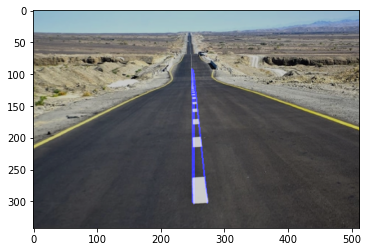

In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def region_of_interest(img,vertices):
    mask=np.zeros_like(img)
    #channel_count=img.shape[2]
    match_mask_color=255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

def draw_the_lines(img,lines):
    img=np.copy(img)
    blank_image=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(0,0,255),2)
        
    img=cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img

image=cv2.imread('Assets/roadlane.png',-1)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

print(image.shape)
height=image.shape[0]
width=image.shape[1]

region_of_interest_vertices=[(0,height),
                             (width/2,height/4),
                             (width,height)]

gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
canny_image=cv2.Canny(gray_image,100,200)
cropped_image=region_of_interest(canny_image,
                                 np.array([region_of_interest_vertices],dtype=np.int32))

lines=cv2.HoughLinesP(cropped_image,
                      rho=2,
                      theta=np.pi/30,
                      threshold=50,
                      lines=np.array([]),
                      minLineLength=40,
                      maxLineGap=100)

image_with_lines=draw_the_lines(image,lines)

plt.imshow(image_with_lines)
plt.show()

# Hough circle transform

In [72]:
import cv2
import numpy as np

img=cv2.imread('Assets/circles.png',-1)
output=img.copy()

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=cv2.medianBlur(gray,5)
circles=cv2.HoughCircles(gray,
                         cv2.HOUGH_GRADIENT,
                         1,#dp
                         minDist=20,#minimum distance between the center of the circles
                         param1=50,#higher threshold passes to the canny edge detector
                         param2=30,#accumulator threshold for the circle centers at the detection stage
                         minRadius=0,
                         maxRadius=0
                        )
#dp is the inverse ratio of accumulator resolution to the image resolution

detected_circles=np.uint16(np.around(circles))
for x,y,r in detected_circles[0,:]:
    cv2.circle(output,(x,y),r,(0,255,0),3)
    cv2.circle(output,(x,y),2,(0,0,255),3)

cv2.imshow('output',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Harris corner detection 

In [ ]:
#corners are regions in the image with large variations in intensity in all the directions

In [79]:
#1 Determines which windows produces very large variations in intensity when moved in both X and Y directions
#2 With each such window found, a score R is computed 
#3 After applying a threshold to this score, important corners are selected and marked
  #R is small,the region is flat
  #R<0 the region is edge
  #R is large, the region is a corner
import cv2
import numpy as np

img=cv2.imread('Assets/chessboard.png',-1)
b,g,r,_=cv2.split(img)
img=cv2.merge((b,g,r))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)
dst=cv2.cornerHarris(gray,2,3,0.04)
#cv2.cornerHarris(img,window size,ksize,K(harris detector free parameter))
dst=cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]#marking the corners with a color

cv2.imshow('img',img)

if cv2.waitKey(0)==ord('q'):
    cv2.destroyAllWindows()

In [98]:
import numpy as np
import cv2 as cv

cap=cv.VideoCapture(0)
# kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))

# fgbg=cv.createBackgroundSubtractorMOG2(detectShadows=True)
fgbg=cv.createBackgroundSubtractorKNN()
# fgbg=cv.createBackgroundSubtractorGMG()
#Gaussian mixture based foreground and background segmentation algorithm

while True:
    ret,frame=cap.read()
    if frame is None:
        break
    fgmask=fgbg.apply(frame)
#     fgmask=cv.morphologyEx(fgmask,cv.MORPH_OPEN,kernel)
    
    cv.imshow('Frame',frame)
    cv.imshow('FG mask Frame',fgmask)
    
    if cv.waitKey(1)==ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [99]:
img=cv.imread('Assets/nimish.png',-1)
fgbg=cv.createBackgroundSubtractorKNN()
fgmask=fgbg.apply(img)

cv.imshow('FG mask Frame',fgmask)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\rand.cpp:394: error: (-215:Assertion failed) !_mat.empty() in function 'cv::RNG::fill'


# Mean shift object tracking 

In [ ]:
#rectangle size does not change
#initial location must be known
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
# take first frame of the video
ret,frame=cap.read()
# setup initial location of window
x,y,width,height=300,200,100,50
track_window=(x,y,width,height)
# setup the ROI for tracking
roi=frame[y:y+height,x:x+width]
# setup the termination criteria,either 10 iteration or move by atleast 1 point
# cv2.imshow('roi',roi)
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
mask=cv2.inRange(hsv_roi,np.array((0.,60.,32.)),np.array((180.,255.,255.)))
roi_hist=cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_crit=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
while True:
    ret,frame=cap.read()
    if ret==True:
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst=cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        #apply meanshift to get the new location
        ret,track_window=cv2.meanShift(dst,track_window,term_crit)
        x,y,w,h=track_window
        final_img=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
        cv2.imshow('final image',final_img)
        if cv2.waitKey(1)==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Object tracking camshift method 

In [100]:
# continuously adaptive meanshift method

In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
# take first frame of the video
ret,frame=cap.read()
# setup initial location of window
x,y,width,height=300,200,100,50
track_window=(x,y,width,height)
# setup the ROI for tracking
roi=frame[y:y+height,x:x+width]
# setup the termination criteria,either 10 iteration or move by atleast 1 point
# cv2.imshow('roi',roi)
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
mask=cv2.inRange(hsv_roi,np.array((0.,60.,32.)),np.array((180.,255.,255.)))
roi_hist=cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_crit=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
while True:
    ret,frame=cap.read()
    if ret==True:
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst=cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        #apply meanshift to get the new location
        ret,track_window=cv2.CamShift(dst,track_window,term_crit)
        x,y,w,h=track_window
        final_img=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
        cv2.imshow('final image',final_img)
        if cv2.waitKey(1)==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
# take first frame of the video
ret,frame=cap.read()
# setup initial location of window
x,y,width,height=300,200,100,50
track_window=(x,y,width,height)
# setup the ROI for tracking
roi=frame[y:y+height,x:x+width]
# setup the termination criteria,either 10 iteration or move by atleast 1 point
# cv2.imshow('roi',roi)
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
mask=cv2.inRange(hsv_roi,np.array((0.,60.,32.)),np.array((180.,255.,255.)))
roi_hist=cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_crit=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
while True:
    ret,frame=cap.read()
    if ret==True:
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst=cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        #apply meanshift to get the new location
        ret,track_window=cv2.CamShift(dst,track_window,term_crit)
        pts=cv2.boxPoints(ret)
        pts=np.int0(pts)
        final_img=cv2.polylines(frame,(pts),True,(0,255,0),3)
#         x,y,w,h=track_window
#         final_img=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
        cv2.imshow('final image',final_img)
        if cv2.waitKey(1)==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
